## Folium


In [1]:
# import the library
import folium
import pandas as pd

In [2]:
 
# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'lat':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
   'lon':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
   'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador'],
   'value':[10,12,40,70,23,43,100,43]
})
data

,lat,lon,name,value
0,-58.00,-34.00,Buenos Aires,10
1,2.00,49.00,Paris,12
2,145.00,-38.00,melbourne,40
3,30.32,59.93,St Petersbourg,70
4,-4.03,5.33,Abidjan,23
5,-73.57,45.52,Montreal,43
6,36.82,-1.29,Nairobi,100
7,-38.50,-12.97,Salvador,43


In [3]:
# Make an empty map
m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)

# Convert data to float to fix issue
data['value'] = data['value'].astype('float')

# I can add marker one by one on the map
for i in range(0,len(data)):
    folium.Circle(
      location=[data.iloc[i]['lon'], data.iloc[i]['lat']],
      popup=data.iloc[i]['name'],
      radius=data.iloc[i]['value']*10000,
      color='crimson',
      fill=True,
      fill_color='crimson'
    ).add_to(m)
    pass

In [4]:
m

   ![](mymap.html)

In [5]:
import os
import folium
import json
import pandas as pd
import branca.colormap as cm

In [6]:
geo_json_data = json.load(open(os.path.join('..', 'data', 'us-states.json')))
unemployment = pd.read_csv(os.path.join('..', 'data', 'US_Unemployment_Oct2012.csv.gz'), compression='gzip')
unemployment_dict = unemployment.set_index('State')['Unemployment']

In [7]:
unemployment.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [8]:
linear = cm.LinearColormap(
    ['green', 'yellow', 'red'],
    vmin=3, vmax=10
)

linear

In [9]:
m = folium.Map([43, -100], tiles='cartodbpositron', zoom_start=4)

folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        'fillColor': linear(unemployment_dict[feature['id']]),
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5'
    }
).add_to(m)

m

## mpl_toolkits
[link](https://python-graph-gallery.com/315-a-world-map-of-surf-tweets/)

## mplleaflet
[link](https://github.com/jwass/mplleaflet)

In [10]:
import matplotlib.pyplot as plt
import mplleaflet
from random import randint


fig, ax = plt.subplots()
x = [randint(-10100, -9400)/100 for i in range(30)]
y = [randint(3700, 4000)/100 for i in range(30)]
ax.plot(x, y, 'bo')
mplleaflet.display(fig=fig)

## Cartopy

In [52]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
from matplotlib.lines import Line2D
import pandas as pd
from matplotlib.cm import get_cmap

In [17]:
top_countries = pd.DataFrame({'country': ['Argentina', 'Australia', 'Angola', 'France', 'United Kingdom'], 'variable': [0.8, 0.6, 0.4, 0.3, 0.2]})
top_countries

,country,variable
0,Argentina,0.8
1,Australia,0.6
2,Angola,0.4
3,France,0.3
4,United Kingdom,0.2


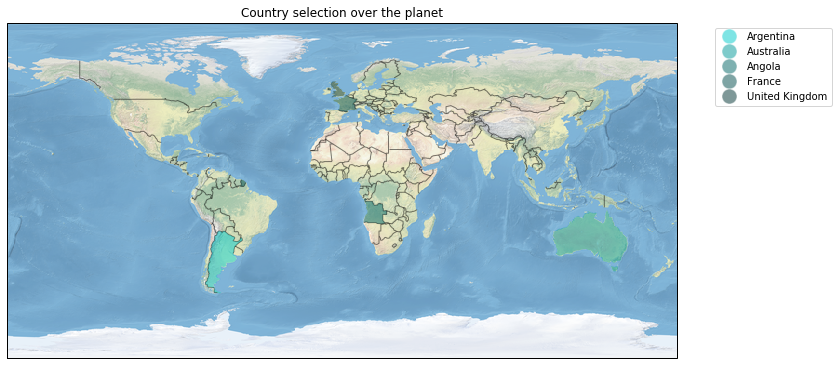

In [49]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
# ax.add_feature(cartopy.feature.LAND)
# ax.add_feature(cartopy.feature.OCEAN)
# ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
# ax.add_feature(cartopy.feature.LAKES, alpha=0.95)
# ax.add_feature(cartopy.feature.RIVERS)
# ax.set_extent([-150, 60, -25, 60])

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
selected_countries = top_countries.country.values.tolist()
tmp = top_countries['variable'].values
normalized_df=(tmp-tmp.min())/(tmp.max()-tmp.min())
for country in countries:
    if country.attributes['NAME_EN'] in selected_countries:
        color = top_countries.loc[top_countries.country == country.attributes['NAME_EN'], 'variable'].values[0]
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=(0, color, color, .5),
                          label=country.attributes['NAME_EN'])
fig = plt.gcf()
fig.set_size_inches(12, 8)
legend_elements = []
for country in selected_countries:
    color = top_countries.loc[top_countries.country == country, 'variable'].values[0]
    label = country
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=(0, color, color, .5), markersize=15))
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1.))
ax.set_title('Country selection over the planet')
plt.show()

In [63]:
south = pd.DataFrame({
    'country': ['Argentina', 'Colombia', 'Uruguay', 'Colombia', 'Brazil', 'Bolivia', 'Ecuador', 'Surinam', 'Chile', 'Venezuela'], 
    'variable': [0.95, 0.8, 0.75, 0.6, 0.55, 0.42, 0.42, 0.31, 0.20, 0.05]})
south

,country,variable
0,Argentina,0.95
1,Colombia,0.80
2,Uruguay,0.75
3,Colombia,0.60
4,Brazil,0.55
5,Bolivia,0.42
6,Ecuador,0.42
7,Surinam,0.31
8,Chile,0.20
9,Venezuela,0.05


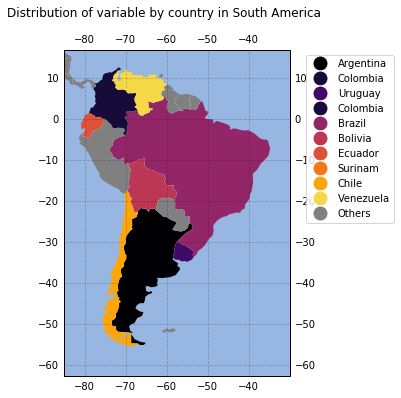

In [65]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
# ax.add_feature(cartopy.feature.COASTLINE)
# ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cartopy.feature.LAKES, alpha=0.95)
ax.add_feature(cartopy.feature.RIVERS)
ax.set_extent([-85, -30, -60, 15])
ax.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')
selected_countries = south.country.values.tolist()
reader = shpreader.Reader(shpfilename)
countries = reader.records()
legend_elements = []
cmap = get_cmap('inferno')
for country in countries:
    if country.attributes['NAME_EN'] in selected_countries:
        color = selected_countries.index(country.attributes['NAME_EN']) / len(selected_countries)
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=cmap(color), label=country.attributes['NAME_EN'])
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=(.5, .5, .5),)
for country in selected_countries:
    color = selected_countries.index(country) / len(selected_countries)
    label = country
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=cmap(color), markersize=15))
legend_elements.append(Line2D([0], [0], marker='o', color='w', label='Others', markerfacecolor=(.5, .5, .5), markersize=15))
fig = plt.gcf()
fig.set_size_inches(14, 6)
plt.suptitle('Distribution of variable by country in South America')
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1.))
plt.show()